In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Grid Search:

Grid search systematically searches through a predefined grid of hyperparameters.
It evaluates each combination of hyperparameters using cross-validation to find the optimal set.

#### Random Search:

Random search randomly samples hyperparameter combinations from predefined distributions.
It evaluates a fixed number of randomly chosen combinations to find the best performing one.

#### Bayesian Optimization:

Bayesian optimization models the objective function and its uncertainty using probabilistic models.
It intelligently selects the next set of hyperparameters to evaluate, based on past observations, to efficiently find the optimal solution.

#### Difference:
Grid search exhaustively evaluates all hyperparameter combinations, while random search randomly samples combinations. Bayesian optimization uses past observations to guide the selection of future hyperparameter combinations, making it more efficient in finding the optimal solution with fewer evaluations.

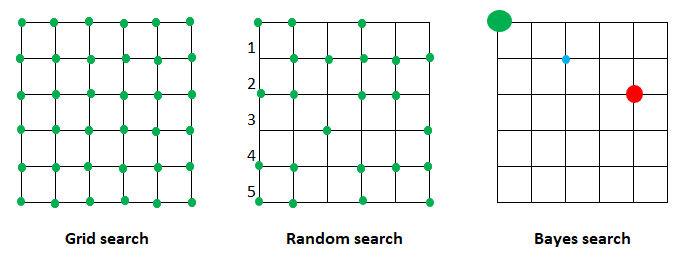

In [2]:
# Grid Search Example
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X, y)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'n_estimators': 200}


In [3]:
# Random Search Example
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

param_dist = {'n_estimators': randint(50, 200),
              'max_depth': [None, 10, 20]}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X, y)
print("Best parameters:", random_search.best_params_)

Best parameters: {'max_depth': 20, 'n_estimators': 53}


In [4]:
import warnings
from skopt import BayesSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define the parameter distribution for BayesSearchCV
param_dist = {'var_smoothing': (1e-9, 1e-1, 'log-uniform')}

# Instantiate the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Instantiate the BayesSearchCV object
bayes_search = BayesSearchCV(gnb, param_dist, n_iter=10, cv=5)

# Fit the model
bayes_search.fit(X, y)

# Print the best parameters and the corresponding score
print("Best parameters:", bayes_search.best_params_)
print("Best cross-validation score:", bayes_search.best_score_)

# Predict on the test set (same as training set here for simplicity)
y_pred = bayes_search.predict(X)

# Calculate and print the accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy on training data:", accuracy)

Best parameters: OrderedDict([('var_smoothing', 0.00020406098617844486)])
Best cross-validation score: 0.9533333333333334
Accuracy on training data: 0.96
